# Mean estimation

In [ ]:
import numpy as np
from scipy import stats

def poisson_3m_calculator(lamb, n):
    
    samples = np.random.poisson(lamb, n)
    
    sample_mean = np.mean(samples)
    sample_median = np.median(samples)
    sample_mode = stats.mode(samples)
    
    print(f"표본 평균: {sample_mean:.2f}")
    print(f"표본 중앙값: {sample_median}")
    print(f"표본 최빈값: {sample_mode.mode[0]}")
np.random.seed(85)
poisson_3m_calculator(7, 100000)

표본 평균: 7.01
표본 중앙값: 7.0
표본 최빈값: 6


# 2번 : Variance estimation


In [ ]:
import numpy as np

def var_estimator(nums, ddof):
    '''
    ddof는 Delta Degrees of Freedom의 약자로, 감소된 자유도를 의미합니다.
    예컨대 분산을 구할 때 ddof=1이면 n-1을 자유도(분모)로 사용합니다.
    주어진 ddof를 이용하여 nums의 분산을 구하시오
    '''
    return np.var(nums, ddof=ddof)


def estimate_iterator(mu, sigma, n, ddof, n_iter):
    '''
    n_iterator 횟수만큼
    주어진 mu와 sigma를 따르는 정규분포에서 n개를 샘플링한 뒤
    추출된 샘플의 분산을, 주어진 ddof를 고려하여 계산한다.
    '''
    estimates = []
    for _ in range(n_iter):
        nums = np.random.normal(mu,sigma,n)
        estimate = var_estimator(nums, ddof)
        estimates.append(estimate)
    return estimates

def bias_reporter(mu, sigma, n, ddof, n_iter):
    '''
    주어진 ddof로 분산을 추정했을 때의 bias가 얼마나 되는지 구한다.
    '''
    estimates = estimate_iterator(mu, sigma, n, ddof, n_iter)
    biasses = np.array(estimates) - sigma**2
    mean_bias = np.mean(biasses)
    print(f'ddof = {ddof}일 때, 분산의 추정값은 평균적으로 {np.mean(estimates):.2f}')
    print(f'따라서 편향은 평균적으로 {mean_bias:.4f}\n')
    return mean_bias

def var_estimate_reporter(mu, sigma, n, n_iter):
    biasses = {}
    print(f'모 표준편차: {sigma**2}\n')
    for ddof in (0, 1):
        biasses[ddof] = bias_reporter(mu, sigma, n, ddof, n_iter)
    print(f'자유도를 n으로 했을 때의 편향은 자유도를 n-1로 했을 때보다 {abs(biasses[0] / biasses[1]):.2f}배 크다')

np.random.seed(85)
var_estimate_reporter(10, 5, 50, 100000)

모 표준편차: 25

ddof = 0일 때, 분산의 추정값은 평균적으로 24.50
따라서 편향은 평균적으로 -0.4980

ddof = 1일 때, 분산의 추정값은 평균적으로 24.98
따라서 편향은 평균적으로 -0.0155

자유도를 n으로 했을 때의 편향은 자유도를 n-1로 했을 때보다 32.07배 크다


# 3번: Mean squared error


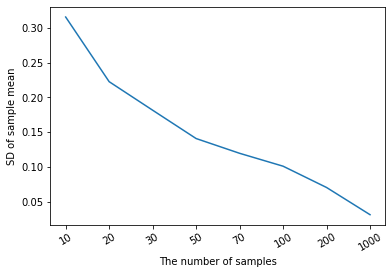

In [14]:
import numpy as np
import matplotlib.pyplot as plt

stds = []
ns = (10, 20, 30, 50, 70, 100, 200, 1000)
for n in ns:
    sample_means = []
    for _ in range(10000):
        samples = np.random.normal(size=n)
        sample_mean = np.mean(samples)
        sample_means.append(sample_mean)

    mean_std = np.std(sample_means)
    stds.append(mean_std)

plt.plot(range(len(ns)), stds)
plt.xticks(range(len(ns)), ns, rotation=30)
plt.xlabel('The number of samples')
plt.ylabel('SD of sample mean')
plt.show()

# 4번 : Maximum likelihood estimation


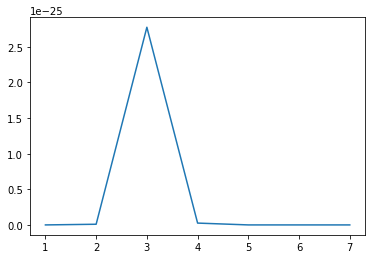

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson

np.random.seed(85)
lamb = 3
samples = np.random.poisson(lamb, 30)

likelihoods = []
lamb_cand = (1,2,3,4,5,6,7) # 모수 후보
for lamb in lamb_cand:
    likelihood = 1
    for sample in samples:
        sample_prob  = poisson(lamb).pmf(sample)
        likelihood *= sample_prob
    likelihoods.append(likelihood)

plt.plot(lamb_cand, likelihoods)
plt.show()


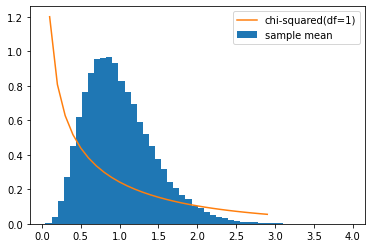

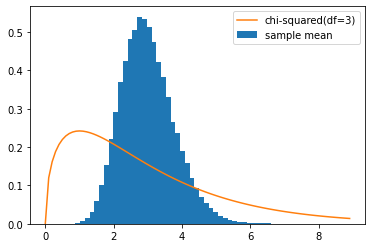

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2

def chi_mean_distribution(df, n):
    sample_means = []
    for _ in range(n):
        samples =  np.random.chisquare(df,size=10)
        sample_mean = np.mean(samples)
        sample_means.append(sample_mean)
    xs = np.arange(0, df*3, 0.1)
    ps = [chi2.pdf(x, df) for x in xs]
    plt.hist(sample_means, density=True, bins=50)
    plt.plot(xs, ps)
    plt.legend([f'chi-squared(df={df})', 'sample mean'])
    plt.show()
    plt.show()

chi_mean_distribution(1, 100000)
chi_mean_distribution(3, 100000)

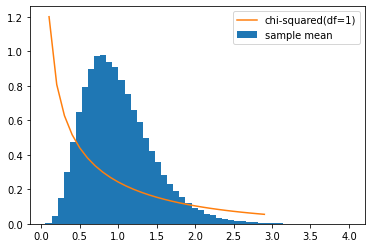

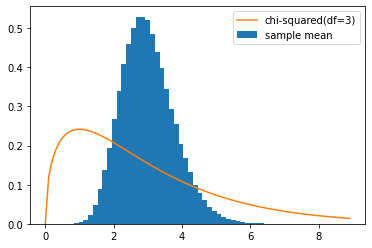

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2


def chi_mean_distribution(df, n):
    sample_means = []
    for _ in range(n):
        samples =  chi2.rvs(df=df, size=10)
        sample_mean = np.mean(samples)
        sample_means.append(sample_mean)
    xs = np.arange(0, df*3, 0.1)
    ps = [chi2.pdf(x, df) for x in xs]
    plt.hist(sample_means, density=True, bins=50)
    plt.plot(xs, ps)
    plt.legend([f'chi-squared(df={df})', 'sample mean'])
    plt.show()
    plt.show()

chi_mean_distribution(1, 100000)
chi_mean_distribution(3, 100000)

# 6번 : Confidence interval


평균 10, 표준 편차 5, 신뢰 수준 0.95, 표본 개수 100일 때
모평균의 점추정값: 10.07, 신뢰구간: (9.24, 10.89)
평균 10, 표준 편차 5, 신뢰 수준 0.99, 표본 개수 100일 때
모평균의 점추정값: 10.53, 신뢰구간: (9.37, 11.69)
평균 10, 표준 편차 5, 신뢰 수준 0.95, 표본 개수 1000일 때
모평균의 점추정값: 9.92, 신뢰구간: (9.66, 10.18)


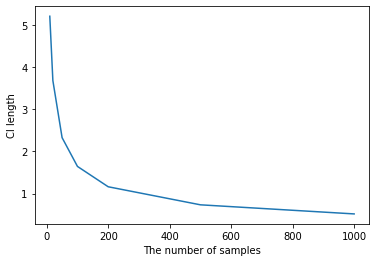

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import math 

def CI_calculator(mu, sigma, alpha, n, ci_print=False):
    samples = np.random.normal(mu,sigma,n)
    x_bar = np.mean(samples)
    error_bound = norm.ppf(1-alpha) * (sigma /math.sqrt(n))
    upper_bound = x_bar + error_bound
    lower_bound = x_bar - error_bound
    CI_length = upper_bound - lower_bound
    if ci_print:
        print(f"평균 {mu}, 표준 편차 {sigma}, 신뢰 수준 {1-alpha}, 표본 개수 {n}일 때")
        print(f"모평균의 점추정값: {x_bar:.2f}, 신뢰구간: ({lower_bound:.2f}, {upper_bound:.2f})")
    else:
        return CI_length

def CI_length_plotter(ns):
    CI_lengths = []
    for n in ns:
        CI_lengths.append(CI_calculator(10, 5, 0.05, n))
    
    plt.plot(ns, CI_lengths)
    plt.xlabel('The number of samples')
    plt.ylabel('CI length')
    plt.show()

CI_calculator(10, 5, 0.05, 100, True)
CI_calculator(10, 5, 0.01, 100, True)
CI_calculator(10, 5, 0.05, 1000, True)
ns = (10, 20, 50, 100, 200, 500, 1000)
CI_length_plotter(ns)

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm


def CI_calculator(mu, sigma, alpha, n, ci_print=False):
    samples = np.random.normal(mu, sigma, n)
    x_bar = np.mean(samples)
    error_bound = sigma/n**(1/2) * abs(norm.ppf(alpha/2))
    upper_bound = x_bar + error_bound
    lower_bound = x_bar - error_bound
    CI_length = upper_bound - lower_bound
    if ci_print:
        print(f"평균 {mu}, 표준 편차 {sigma}, 신뢰 수준 {1-alpha}, 표본 개수 {n}일 때")
        print(f"모평균의 점추정값: {x_bar:.2f}, 신뢰구간: ({lower_bound:.2f}, {upper_bound:.2f})")
    else:
        return CI_length


def CI_length_plotter(ns):
    CI_lengths = []
    for n in ns:
        CI_lengths.append(CI_calculator(10, 5, 0.05, n))
CI_calculator(10, 5, 0.05, 100, True)
CI_calculator(10, 5, 0.01, 100, True)
CI_calculator(10, 5, 0.05, 1000, True)
ns = (10, 20, 50, 100, 200, 500, 1000)
CI_length_plotter(ns)

평균 10, 표준 편차 5, 신뢰 수준 0.95, 표본 개수 100일 때
모평균의 점추정값: 9.53, 신뢰구간: (8.55, 10.51)
평균 10, 표준 편차 5, 신뢰 수준 0.99, 표본 개수 100일 때
모평균의 점추정값: 10.78, 신뢰구간: (9.49, 12.07)
평균 10, 표준 편차 5, 신뢰 수준 0.95, 표본 개수 1000일 때
모평균의 점추정값: 10.04, 신뢰구간: (9.73, 10.35)


In [3]:
import numpy as np

def chi_bootstrap_median_CI(df, n, bootstrap_count):
    samples = np.random.chisquare(df, n)

    medians = []
    for _ in range(bootstrap_count):
        bootstrap_sample = np.random.choice(samples, size=n) 
        bootstrap_median = np.median(bootstrap_sample)
        medians.append(bootstrap_median)

    upper_bound = np.quantile(medians, 0.975)
    lower_bound = np.quantile(medians, 0.025)
    print(f"Bootstrap CI: ({lower_bound:.2f}, {upper_bound:.2f})")

def chi_median_distribution(df, n, sample_count):
    medians = []
    for _ in range(sample_count):
        samples = np.random.chisquare(df, n)
        sample_median = np.median(samples)
        medians.append(sample_median)
        
    upper_bound = np.quantile(medians, 0.975)
    lower_bound = np.quantile(medians, 0.025)
    print(f"Sample CI: ({lower_bound:.2f}, {upper_bound:.2f})")

np.random.seed(85)

df = 23
n = 200
repeat_count = 10000

chi_bootstrap_median_CI(df, n, repeat_count)
chi_median_distribution(df, n, repeat_count)

Bootstrap CI: (20.91, 23.21)
Sample CI: (21.21, 23.51)


# 8번: Maximum Log-likelihood Estimation


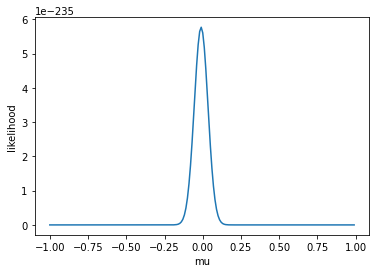

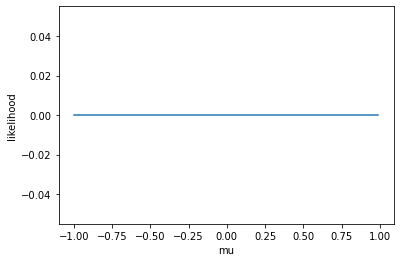

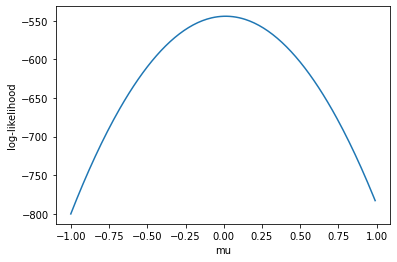

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

def likelihood_plotter(n, method):
    samples = np.sort(np.random.uniform(-1, 1, n)) # -1과 1 사이에서 n개 샘플링
    mu_likelihood = {}
    for mu in np.arange(-1,1,0.01):
        if method == 'likelihood':
            mu_likelihood[mu] =  np.product(norm.pdf(samples, mu))
        elif method == 'log-likelihood':
            mu_likelihood[mu] = np.sum(np.log(norm.pdf(samples,mu)))

    plt.plot(list(mu_likelihood.keys()), list(mu_likelihood.values()))
    plt.xlabel('mu')
    plt.ylabel(method)
    plt.show()
likelihood_plotter(500, 'likelihood')
likelihood_plotter(1000, 'likelihood')
likelihood_plotter(500, 'log-likelihood')

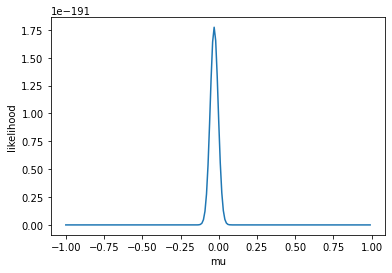

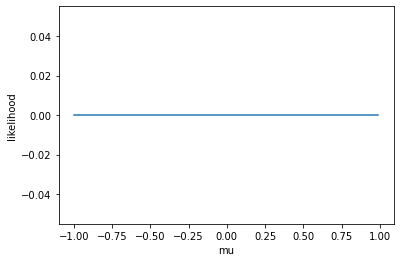

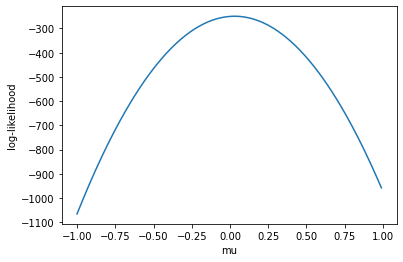

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm


def likelihood_plotter(n, method):
    samples = np.sort(np.random.uniform(-1, 1, n)) # -1과 1 사이에서 n개 샘플링
    mu_likelihood = {}
    for mu in np.arange(-1,1,0.01):
        if method == 'likelihood':
            mu_likelihood[mu] = np.prod(norm.pdf(samples, mu, np.std(samples, ddof=1)))
        elif method == 'log-likelihood':
            mu_likelihood[mu] = np.sum(-(samples-mu)**2/(2 * np.std(samples, ddof=1)**2))


    plt.plot(list(mu_likelihood.keys()), list(mu_likelihood.values()))
    plt.xlabel('mu')
    plt.ylabel(method)
    plt.show()
likelihood_plotter(500, 'likelihood')
likelihood_plotter(1000, 'likelihood')
likelihood_plotter(500, 'log-likelihood')

# 9번: Bayes' theorem


In [27]:
def baeys_prob(prevalence_rate, abnormal_test_positive, normal_test_positive):
    # 질병이 있고 양/음성이 나올 확률
    abnormal_positive_ratio = prevalence_rate * abnormal_test_positive
    abnormal_negative_ratio = prevalence_rate * (1-abnormal_test_positive)
    # 질병이 없고 양성이 나올 확률
    normal_positive_ratio = (1-prevalence_rate) * normal_test_positive
    
    # 양성의 비율
    positive_ratio = abnormal_positive_ratio + normal_positive_ratio
    positive_abnormal_ratio = abnormal_positive_ratio /positive_ratio

    print(f"유병률: {100*prevalence_rate:.1f}%")
    print(f"질병이 있을 때 양성이 나올 확률: {100*abnormal_test_positive:.1f}%")
    print(f"질병이 없을 때 양성이 나올 확률: {100*normal_test_positive:.1f}%")
    print(f"양성이 나왔을 때 실제 질병이 있을 확률: {100*positive_abnormal_ratio:.2f}%")
    print(f"질병이 있는데 음성이 나올 확률: {100*abnormal_negative_ratio:.2f}%")

baeys_prob(0.7, 0.99, 0.01)
baeys_prob(0.005, 0.98, 0.02)
baeys_prob(0.02, 0.99, 0.01)

유병률: 70.0%
질병이 있을 때 양성이 나올 확률: 99.0%
질병이 없을 때 양성이 나올 확률: 1.0%
양성이 나왔을 때 실제 질병이 있을 확률: 99.57%
질병이 있는데 음성이 나올 확률: 0.70%
유병률: 0.5%
질병이 있을 때 양성이 나올 확률: 98.0%
질병이 없을 때 양성이 나올 확률: 2.0%
양성이 나왔을 때 실제 질병이 있을 확률: 19.76%
질병이 있는데 음성이 나올 확률: 0.01%
유병률: 2.0%
질병이 있을 때 양성이 나올 확률: 99.0%
질병이 없을 때 양성이 나올 확률: 1.0%
양성이 나왔을 때 실제 질병이 있을 확률: 66.89%
질병이 있는데 음성이 나올 확률: 0.02%
